## Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**
https://github.com/rosemaryjuarez/eds-223-week-5


Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average salmon catches by region from 1878 to 1997'}, xlabel='Region', ylabel='Count'>

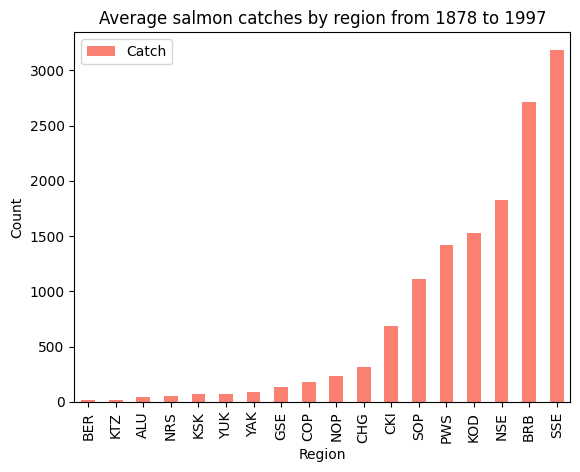

In [14]:
# import packages

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#reading csv
catch_original = pd.read_csv('salmon_data.csv')
#reading firrst 5 rows
catch_original.head()

# printing the unique values first(ERROR coming out, but becuase i already ran it)

#print(catch_original.notesRegCode.unique())

#removing notesRegCode column (NOTE: SINCE I DID IT ONCE ALREADY, ERROR WILL APPEAR. so the code will be commented)
#catch_original = catch_original.drop(columns = 'notesRegCode')

catch_original.head()

# checking the datatypes in the columns

catch_original.dtypes

# ANSWER: we dont have the expected data type for 'catch' column, as that should be Int64, rather than object.
# Catch appears to be discrete variables, and having it as an object is not feasable

# for the next step we discovered that the letter I isnt allowing us to convert 'catch' to int64
# finding the 'I' in catch using .loc
catch_original.loc[catch_original.Catch == 'I']

# i will be  using .at method to access row 400 and change it to the string number 1

catch_original.at[400, 'Catch'] = '1'
catch_original.loc[catch_original.Catch == 'I']

# changing to int64
catch_original['Catch'] = catch_original.Catch.astype('int64')

#checking if int64 now
catch_original.dtypes

#creating a new variable that will be from 1878 to 1997
catch_year = catch_original[(catch_original.Year >= 1878) & (catch_original.Year <= 1997)]

#now i want to change it to datetime format:
catch_year.Year = pd.to_datetime(catch_year.Year)

# creating the average catch per region
region_avg = catch_year.groupby('Region').mean('Catch')
region_avg


region_avg.sort_values('Catch').plot(kind = 'bar',
                                    title = 'Average salmon catches by region from 1878 to 1997',
                                    color = 'Salmon',
                                    ylabel = 'Count')

In [2]:
# import packages

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [22]:
#reading csv
catch_original = pd.read_csv('salmon_data.csv')
#reading firrst 5 rows
catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [23]:
# printing the unique values first(ERROR coming out, but becuase i already ran it)

#print(catch_original.notesRegCode.unique())

#removing notesRegCode column (NOTE: SINCE I DID IT ONCE ALREADY, ERROR WILL APPEAR. so the code will be commented)
#catch_original = catch_original.drop(columns = 'notesRegCode')

catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [24]:
# checking the datatypes in the columns

catch_original.dtypes

# ANSWER: we dont have the expected data type for 'catch' column, as that should be Int64, rather than object.
# Catch appears to be discrete variables, and having it as an object is not feasable

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [25]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [26]:
# finding the 'I' in catch using .loc
catch_original.loc[catch_original.Catch == 'I']

,Region,Year,notesRegCode,Species,Catch
400,GSE,1955,NaN,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [27]:
# i will be  using .at method to access row 400

catch_original.at[400, 'Catch'] = '1'
catch_original.loc[catch_original.Catch == 'I']

,Region,Year,notesRegCode,Species,Catch


## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [28]:
# changing to int64
catch_original['Catch'] = catch_original.Catch.astype('int64')

#checking if int64 now
catch_original.dtypes

Region          object
Year             int64
notesRegCode    object
Species         object
Catch            int64
dtype: object

In [10]:
catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [38]:
catch_year = catch_original[(catch_original.Year >= 1878) & (catch_original.Year <= 1997)]

In [39]:
catch_year.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


In [45]:
catch_year.Year = pd.to_datetime(catch_year.Year)


In [46]:
# creating the average catch per region
region_avg = catch_year.groupby('Region').mean('Catch')
region_avg

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average salmon catches by region from 1878 to 1997'}, xlabel='Region'>

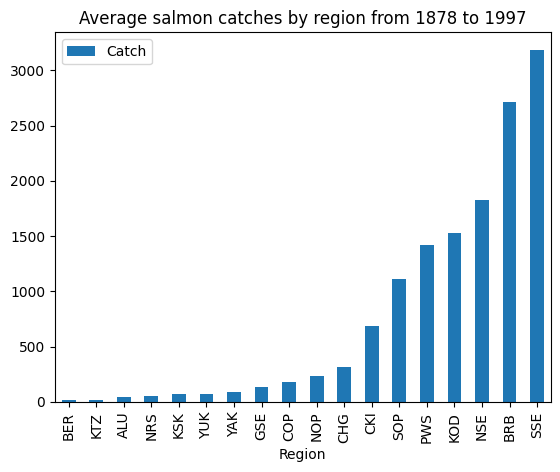

In [47]:
region_avg.sort_values('Catch').plot(kind = 'bar',
                                    title = 'Average salmon catches by region from 1878 to 1997',
                                    )


## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.

In [ ]:
region_avg.plot(kind = 'bar')